In [32]:
import gym
import numpy as np
from tqdm import tqdm

In [33]:
environment = gym.make('FrozenLake-v1',is_slippery =False,render_mode="ansi")
environment.reset()

nb_states = environment.observation_space.n #satırlar 16 tane
nb_actions = environment.action_space.n #sutunlar 4 tane

qtable = np.zeros((nb_states,nb_actions))
print("Q-table")
print(qtable) #ajanin beyni


Q-table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


render_mode----görselleştirme için gerekli
is_slippery----ajanın kaygan bir yüzeyde hareket ettiğini varsaymak

### sol:0,asagi:1,sag:2,yukari:3 ###

###

In [34]:
action = environment.action_space.sample()

new_state,reward,done,info, _= environment.step(action)

bolum sayisini belirleme


In [35]:
episodes = 1000 #1000 bolum
alpha = 0.5 #learning rate
gama = 0.9 #discount rate
outcomes = []

training

In [36]:
for _ in range(episodes):
    state,_ =environment.reset()
    done = False #ajanin basari durumu
    outcomes.append("Failure")
    while not done:#ajan basarili olana kadar state icerisinde hareket et (action sec ve uygula)
        #action
        if np.max(qtable[state])>0:
            action =np.argmax(qtable[state])
        else:
            action = environment.action_space.sample()

        new_state,reward,done,info, _= environment.step(action)

        #update q table
        qtable[state,action] = qtable[state,action] + alpha*(reward + gama * np.max(qtable[new_state])- qtable[state,action])

        state =new_state
        if reward:
            outcomes[-1] = "Success"


Qtable After Training:
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.9     0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


<BarContainer object of 1000 artists>

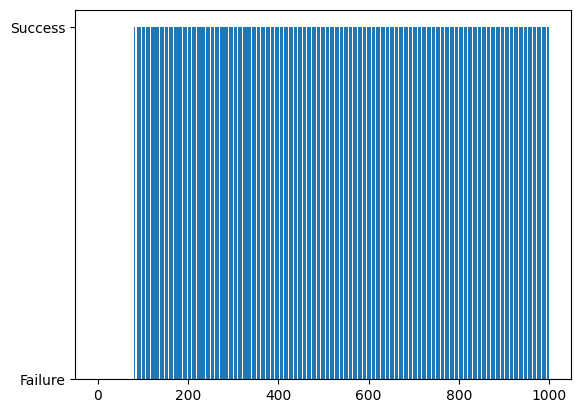

In [37]:
import matplotlib.pyplot as plt
print("Qtable After Training:")
print(qtable)

plt.bar(range(episodes),outcomes)

test

In [39]:
episodes = 100 #100 bolum
nb_success = 0

for _ in range(episodes):
    state,_ =environment.reset()
    done = False #ajanin basari durumu
    while not done:#ajan basarili olana kadar state icerisinde hareket et (action sec ve uygula)
        #action
        if np.max(qtable[state])>0:
            action =np.argmax(qtable[state])
        else:
            action = environment.action_space.sample()

        new_state,reward,done,info, _= environment.step(action)


        state =new_state
        nb_success+= reward

import matplotlib.pyplot as plt
print("Success rate:",100*nb_success/episodes)
print(qtable)


Success rate: 100.0
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.9     0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]
